In [14]:
import pandas as pd
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import powerlaw as pl

#Loading the data
G=nx.read_gml('power.gml', label='id')

#Graph summary
print("Number of Nodes: ",G.number_of_nodes())
print("Number of Edges: ",G.number_of_edges())


Number of Nodes:  4941
Number of Edges:  6594


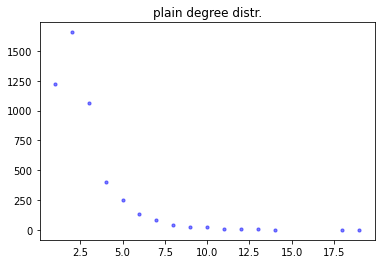

In [8]:
#Degree distribution
# make a dictionary of the degrees of the network
d = dict(G.degree)
# turn into a count of degree (the values of the dict)
counter = Counter(d.values())
# Make it into a dataframe
counter = pd.DataFrame(list(counter.items()), columns = ("k", "count")).sort_values(by = "k")
# We plot the degree distr. and save it to a file
plt.scatter(counter['k'], counter['count'], c = 'blue', s=10, alpha=0.5)
plt.title("plain degree distr.")
plt.savefig("degree_distribution.png")
plt.show()


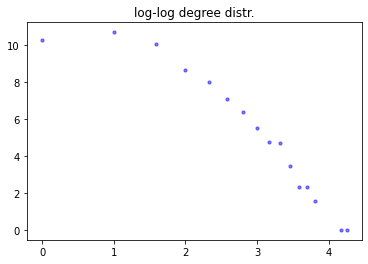

In [9]:
#plot in log-log scale
plt.scatter(np.log2(counter['k']), np.log2(counter['count']), c = 'blue', s=10, alpha=0.5)
plt.title("log-log degree distr.")
plt.savefig("loglog_degree_distribution.png")
plt.show()

<AxesSubplot:xlabel='k'>

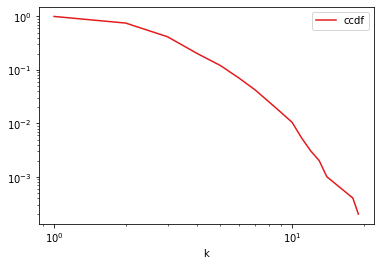

In [21]:
ccdf = counter.sort_values(by = "k", ascending = False)
ccdf["cumsum"] = ccdf["count"].cumsum()
ccdf["ccdf"] = ccdf["cumsum"] / ccdf["count"].sum()
ccdf = ccdf[["k", "ccdf"]].sort_values(by = "k")
ccdf.plot(kind = "line", x = "k", y = "ccdf", color = "#e41a1c", loglog = True)

In [18]:
from scipy.stats import linregress
# do a linear regr.
logcdf = np.log10(ccdf[["k", "ccdf"]])
slope, log10intercept, r_value, p_value, std_err = linregress(logcdf["k"], logcdf["ccdf"])
print("CCDF Fit: %1.4f x ^ %1.4f (R2 = %1.4f, p = %1.4f)" % (10 ** log10intercept, slope, r_value ** 2, p_value))

CCDF Fit: 7.0197 x ^ -3.0523 (R2 = 0.8882, p = 0.0000)


Calculating best minimal value for power law fit
Powerlaw CCDF Fit: 12.4207 x ^ -1.4448 (k_min = 10)


<AxesSubplot:xlabel='k'>

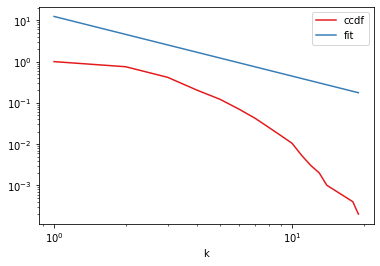

In [19]:
results = pl.Fit(ccdf["ccdf"])
k_min = ccdf[ccdf["ccdf"] == results.power_law.xmin]["k"]
print("Powerlaw CCDF Fit: %1.4f x ^ -%1.4f (k_min = %d)" % (10 ** results.power_law.Kappa, results.power_law.alpha, k_min))

# Let's plot the best fit.
ccdf["fit"] = (10 ** results.power_law.Kappa) * (ccdf["k"] ** -results.power_law.alpha)
ax = plt.gca()
ccdf.plot(kind = "line", x = "k", y = "ccdf", color = "#e41a1c", loglog = True, ax = ax)
ccdf.plot(kind = "line", x = "k", y = "fit", color = "#377eb8", loglog = True, ax = ax)

CCDF Fit: 7.0197 x ^ -3.0523 (R2 = 0.8882, p = 0.0000)


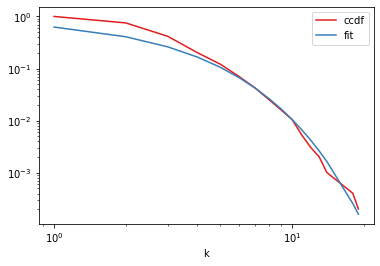

In [24]:
from scipy.optimize import curve_fit
def f(x, a, l):
   return (x ** a) * np.exp(-l * x) 

def log_f(x, a, l):
   return np.log10(f(x, a, l))

# we use the defined functions above to fit the curve to the CCDF
popt, pcov = curve_fit(log_f, ccdf["k"], np.log10(ccdf["ccdf"]), p0 = (1, 1))
ccdf["fit"] = ccdf.apply(lambda x: f(x["k"], popt[0], popt[1]), axis = 1)

# plot it
ax = plt.gca()
ccdf.plot(kind = "line", x = "k", y = "ccdf", color = "#e41a1c", loglog = True, ax = ax)
ccdf.plot(kind = "line", x = "k", y = "fit", color = "#377eb8", loglog = True, ax = ax)


In [26]:
#CLUSTERING COEFFICIENTS OF NETWORK

# Global Clustering Coefficient
global_clustering_coefficient = nx.transitivity(G)
print("Global Clustering Coefficient:", global_clustering_coefficient)

# Average Clustering Coefficient
average_clustering_coefficient = nx.average_clustering(G)
print("Average Clustering Coefficient:", average_clustering_coefficient)

# Local Clustering Coefficient (for a specific node 'node_id')
node_id = 0  # Replace with the node you want to calculate for
local_clustering_coefficient = nx.clustering(G)
print(f'dictinary of local clustering coefficients: {local_clustering_coefficient}')

Global Clustering Coefficient: 0.10315322452860086
Average Clustering Coefficient: 0.08010361108159711
dictinary of local clustering coefficients: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0.3333333333333333, 27: 0, 28: 0, 29: 0, 30: 1.0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0.1, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0.1, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0.3, 57: 0, 58: 0.16666666666666666, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0.3333333333333333, 73: 0, 74: 0, 75: 0, 76: 0.16666666666666666, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 1.0, 85: 0, 86: 0.3333333333333333, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0.047619047619047616, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0

In [27]:
#Largest click is only 6 nodes

cliques = nx.find_cliques(G)
cliques = list(cliques)

# the function nx.graph_clique_number() returns the size of the maximal clique.
largest_clique = nx.graph_clique_number(G, cliques = cliques)
print(f'The largest clique is of size {largest_clique}')

# if we want to find out which nodes are in the cliques, we iterate iver the list of all cliques
# and find the one who have a size of 9 nodes

for i in cliques:
    if len(i) == largest_clique:
        print(i)

The largest clique is of size 6
[4332, 4381, 4347, 4402, 4398, 4335]
[4344, 4384, 4413, 4352, 4408, 4401]


In [35]:
#AVERAGE PATH LENGTH
print(nx.average_shortest_path_length(G))
#diameter
print(nx.diameter(G))

18.989185424445708
46


In [31]:

pagerank = nx.pagerank(G)
max_node = max(pagerank, key = pagerank.get)
# key=pagerank.get is used as a custom sorting key for the max function. 
# It tells Python to use the values from the pagerank dictionary 
# (the PageRank scores) to determine the maximum value.

print(f'The most central node is {max_node}, with a pagerank of {round(pagerank[max_node], 5)}')

The most central node is 4458, with a pagerank of 0.00122
